In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from numpy.linalg import solve


In [76]:
def calcTemperature(U):
    T = 25.1414 * U * 1000 + 23.2773
    return T
def calcVoltage(T):
    U = (T-23.2773)/(25.1414*1000)
    return U

In [77]:
#Schnittgerade berechnen
def line_intersection(line1, line2):
    zaehler = line2[1]-line1[1]
    nenner = line1[0]-line2[0]
    if nenner == 0:
        raise Exception('lines do not intersect')

    x = zaehler/nenner
    y = line1[0] * x + line1[0]
    return x, y


In [78]:
with open('data0003.dat') as data:
    T1Abkuehlen = 23.2773 + 25.1414 * 1000 * np.loadtxt(data, usecols= 0)
with open('data0003.dat') as data:
    R1Abkuelen = np.loadtxt(data, usecols= 1)

with open('data0002.dat') as data:
    T2Aufwaermen = 23.2773 + 25.1414 * 1000 * np.loadtxt(data, usecols= 0)
with open('data0002.dat') as data:
    R2Aufwaermen = np.loadtxt(data, usecols= 1)


In [79]:
calcVoltage(180)



0.006233650472925135

In [80]:
#Parameters Abkuelen
NormalbereichT1 = T1Abkuehlen[26705:31870]
AbkuehlungsbereichT1 = T1Abkuehlen[32769: 33089]
NormalbereichR1 = R1Abkuelen[26705:31870]
AbkuehlungsbereichR1 = R1Abkuelen[32769: 33089]
linear_model=np.polyfit(NormalbereichT1, NormalbereichR1,1)
linear_model_fn=np.poly1d(linear_model)
x_fit = np.arange(T1Abkuehlen[len(T1Abkuehlen)-1],T1Abkuehlen[26705])
linear_model_abkuehlung=np.polyfit(AbkuehlungsbereichT1, AbkuehlungsbereichR1,1)
linear_model_abkuehlung_fn=np.poly1d(linear_model_abkuehlung)
x_fit_abkuehlung= np.arange(T1Abkuehlen[33210],T1Abkuehlen[31875])

#Parameters Aufwaermen
NormalbereichT2 = T2Aufwaermen[4589:]
AbkuehlungsbereichT2 = T2Aufwaermen[1927: 2951]
NormalbereichR2 = R2Aufwaermen[4589:]
AbkuehlungsbereichR2 = R2Aufwaermen[1927: 2951]
linear_model2=np.polyfit(NormalbereichT2, NormalbereichR2,1)
linear_model2_fn=np.poly1d(linear_model2)
x_fit2 = np.arange(T2Aufwaermen[1475],T2Aufwaermen[len(T2Aufwaermen)-1])
linear_model2_abkuehlung=np.polyfit(AbkuehlungsbereichT2, AbkuehlungsbereichR2,1)
linear_model2_abkuehlung_fn=np.poly1d(linear_model2_abkuehlung)
x_fit2_abkuehlung= np.arange(T2Aufwaermen[1475],T2Aufwaermen[3703])

In [81]:
TC0Abkuehlen = calcTemperature(0.004043189)
TC0Aufwaermen = calcTemperature(0.003254187)

intersection = line_intersection(linear_model,linear_model_abkuehlung)
intersection2 = line_intersection(linear_model2,linear_model2_abkuehlung)

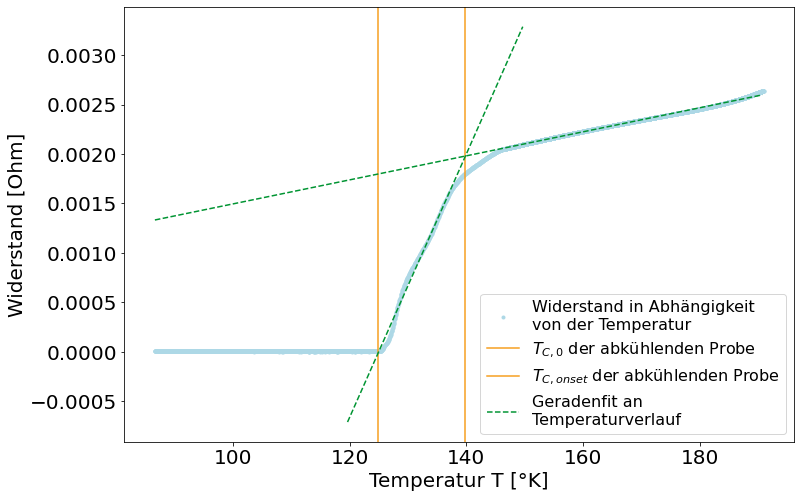

In [82]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Plot Abkuehlen
fig, ax = plt.subplots(figsize=(12,8))

#Name for axis
ax.set_xlabel('Temperatur T [°K]', fontsize=20)
ax.set_ylabel('Widerstand [Ohm]', fontsize=20)
#Plot
ax.plot(T1Abkuehlen[26705:], R1Abkuelen[26705:],'o',markersize=3, color = "lightblue",label = "Widerstand in Abhängigkeit \nvon der Temperatur")
#T0 plot
ax.axvline(TC0Abkuehlen, 0, 1, linestyle = '-', color="#F79F1F", label='$T_{C,0}$ der abkühlenden Probe')
#TC onset
ax.axvline(intersection[0], 0, 1, linestyle = '-', color="#F79F1F", label='$T_{C,onset}$ der abkühlenden Probe')


#Fitplot
ax.plot(x_fit,linear_model_fn(x_fit), linestyle = '--', color="#009432",label='Geradenfit an \nTemperaturverlauf')
ax.plot(x_fit_abkuehlung, linear_model_abkuehlung_fn(x_fit_abkuehlung), linestyle = '--', color="#009432")

ax.legend(fontsize=16, loc='lower right')

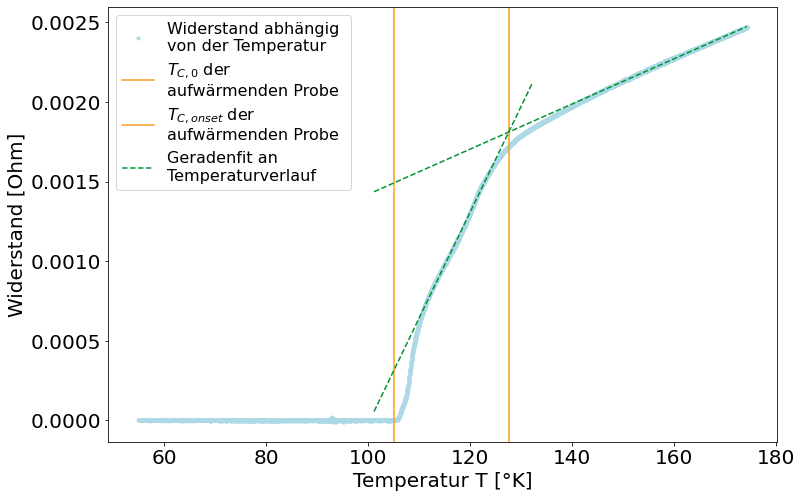

In [83]:
#Plot Abkuehlen
fig, ax = plt.subplots(figsize=(12,8))

#Name for axis
ax.set_xlabel('Temperatur T [°K]', fontsize=20)
ax.set_ylabel('Widerstand [Ohm]', fontsize=20)
#Plot
ax.plot(T2Aufwaermen, R2Aufwaermen,'o',markersize=3, color = "lightblue",label = "Widerstand abhängig \nvon der Temperatur")
#T0 plot
ax.axvline(TC0Aufwaermen, 0, 1, linestyle = '-', color="#F79F1F", label='$T_{C,0}$ der \naufwärmenden Probe')
#TC onset
ax.axvline(intersection2[0], 0, 1, linestyle = '-', color="#F79F1F", label='$T_{C,onset}$ der \naufwärmenden Probe')


#Fitplot
ax.plot(x_fit2,linear_model2_fn(x_fit2), linestyle = '--', color="#009432",label='Geradenfit an \nTemperaturverlauf')
ax.plot(x_fit2_abkuehlung, linear_model2_abkuehlung_fn(x_fit2_abkuehlung), linestyle = '--', color="#009432")

ax.legend(fontsize=16, loc=2)